/opt/conda/envs/ricequant/lib/python3.5/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/opt/conda/envs/ricequant/lib/python3.5/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/opt/conda/envs/ricequant/lib/python3.5/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


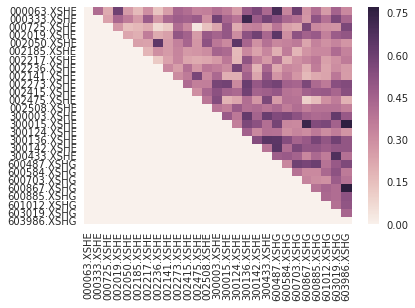

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame

stock_list=['600519.XSHG','000418.XSHE']
prices_df=get_price(stock_list, start_date='20180101', end_date='20180708', fields='close')
change0=prices_df.ix[:,0].pct_change().dropna()
change1=prices_df.ix[:,1].pct_change().dropna()
corr=np.corrcoef(change0, change1)

stock_list=['000063.XSHE','000333.XSHE','000725.XSHE','002019.XSHE','002050.XSHE','002185.XSHE','002217.XSHE','002236.XSHE','002141.XSHE','002273.XSHE','002415.XSHE','002475.XSHE','002508.XSHE','300003.XSHE','300015.XSHE','300124.XSHE','300136.XSHE','300142.XSHE','300433.XSHE','600487.XSHG','600584.XSHG','600703.XSHG','600867.XSHG','600885.XSHG','601012.XSHG','603019.XSHG','603986.XSHG']
prices_df=get_price(stock_list, start_date='20180104', end_date='20180709', fields='close')


def find_corr(df):
    n=df.shape[1]
    corr_matrix=np.zeros((n,n))
    keys=df.keys()
    for i in range(n):
        for j in range(i+1, n):
            stock1_change=df[keys[i]].pct_change().dropna()
            stock2_change=df[keys[j]].pct_change().dropna()
            result=np.corrcoef(stock1_change, stock2_change)[0][1]
            corr_matrix[i, j]=result
    return corr_matrix

matrix = find_corr(prices_df)   
sns.heatmap(matrix, xticklabels=stock_list, yticklabels=stock_list)